## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tenso

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
Compile 模型
"""

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 12s 233us/step - loss: 0.9731 - accuracy: 0.6549 - val_loss: 1.3296 - val_accuracy: 0.5434
Epoch 2/500
50000/50000 [==============================] - 10s 209us/step - loss: 0.9477 - accuracy: 0.6674 - val_loss: 1.3225 - val_accuracy: 0.5466
Epoch 3/500
50000/50000 [==============================] - 11s 217us/step - loss: 0.9359 - accuracy: 0.6720 - val_loss: 1.3197 - val_accuracy: 0.5464
Epoch 4/500
50000/50000 [==============================] - 11s 215us/step - loss: 0.9282 - accuracy: 0.6740 - val_loss: 1.3183 - val_accuracy: 0.5452
Epoch 5/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.9227 - accuracy: 0.6758 - val_loss: 1.3174 - val_accuracy: 0.5491
Epoch 6/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.9184 - accuracy: 0.6772 - val_loss: 1.3172 - val_accuracy: 0.5484
Epoch 7/500
50000/50000 [=========================

Epoch 55/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.8741 - accuracy: 0.6953 - val_loss: 1.3351 - val_accuracy: 0.5483
Epoch 56/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.8737 - accuracy: 0.6954 - val_loss: 1.3357 - val_accuracy: 0.5481
Epoch 57/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.8732 - accuracy: 0.6959 - val_loss: 1.3360 - val_accuracy: 0.5482
Epoch 58/500
50000/50000 [==============================] - 10s 203us/step - loss: 0.8728 - accuracy: 0.6960 - val_loss: 1.3363 - val_accuracy: 0.5476
Epoch 59/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.8724 - accuracy: 0.6957 - val_loss: 1.3365 - val_accuracy: 0.5484
Epoch 60/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.8720 - accuracy: 0.6959 - val_loss: 1.3364 - val_accuracy: 0.5490
Epoch 61/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.8716 - ac

50000/50000 [==============================] - 10s 201us/step - loss: 0.8553 - accuracy: 0.7020 - val_loss: 1.3478 - val_accuracy: 0.5479
Epoch 110/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.8549 - accuracy: 0.7019 - val_loss: 1.3475 - val_accuracy: 0.5481
Epoch 111/500
50000/50000 [==============================] - 11s 223us/step - loss: 0.8547 - accuracy: 0.7011 - val_loss: 1.3482 - val_accuracy: 0.5474
Epoch 112/500
50000/50000 [==============================] - 11s 228us/step - loss: 0.8544 - accuracy: 0.7023 - val_loss: 1.3481 - val_accuracy: 0.5480
Epoch 113/500
50000/50000 [==============================] - 11s 216us/step - loss: 0.8541 - accuracy: 0.7017 - val_loss: 1.3483 - val_accuracy: 0.5478
Epoch 114/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.8538 - accuracy: 0.7022 - val_loss: 1.3487 - val_accuracy: 0.5481
Epoch 115/500
50000/50000 [==============================] - 10s 204us/step - loss: 0.8535 - accuracy:

Epoch 163/500
50000/50000 [==============================] - 12s 239us/step - loss: 0.8402 - accuracy: 0.7070 - val_loss: 1.3577 - val_accuracy: 0.5466
Epoch 164/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.8399 - accuracy: 0.7078 - val_loss: 1.3581 - val_accuracy: 0.5468
Epoch 165/500
50000/50000 [==============================] - 12s 246us/step - loss: 0.8397 - accuracy: 0.7073 - val_loss: 1.3588 - val_accuracy: 0.5470
Epoch 166/500
50000/50000 [==============================] - 12s 248us/step - loss: 0.8395 - accuracy: 0.7073 - val_loss: 1.3585 - val_accuracy: 0.5468
Epoch 167/500
50000/50000 [==============================] - 13s 257us/step - loss: 0.8392 - accuracy: 0.7077 - val_loss: 1.3584 - val_accuracy: 0.5468
Epoch 168/500
50000/50000 [==============================] - 11s 220us/step - loss: 0.8390 - accuracy: 0.7076 - val_loss: 1.3588 - val_accuracy: 0.5458
Epoch 169/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.83

50000/50000 [==============================] - 12s 235us/step - loss: 0.8272 - accuracy: 0.7117 - val_loss: 1.3676 - val_accuracy: 0.5456
Epoch 217/500
50000/50000 [==============================] - 11s 227us/step - loss: 0.8269 - accuracy: 0.7116 - val_loss: 1.3677 - val_accuracy: 0.5458
Epoch 218/500
50000/50000 [==============================] - 11s 215us/step - loss: 0.8267 - accuracy: 0.7119 - val_loss: 1.3680 - val_accuracy: 0.5459
Epoch 219/500
50000/50000 [==============================] - 11s 215us/step - loss: 0.8265 - accuracy: 0.7120 - val_loss: 1.3682 - val_accuracy: 0.5461
Epoch 220/500
50000/50000 [==============================] - 11s 214us/step - loss: 0.8262 - accuracy: 0.7126 - val_loss: 1.3690 - val_accuracy: 0.5457
Epoch 221/500
50000/50000 [==============================] - 11s 213us/step - loss: 0.8260 - accuracy: 0.7122 - val_loss: 1.3683 - val_accuracy: 0.5450
Epoch 222/500
50000/50000 [==============================] - 11s 214us/step - loss: 0.8258 - accuracy:

Epoch 270/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.8147 - accuracy: 0.7155 - val_loss: 1.3768 - val_accuracy: 0.5443
Epoch 271/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.8145 - accuracy: 0.7165 - val_loss: 1.3776 - val_accuracy: 0.5441
Epoch 272/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.8143 - accuracy: 0.7163 - val_loss: 1.3780 - val_accuracy: 0.5440
Epoch 273/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.8140 - accuracy: 0.7160 - val_loss: 1.3781 - val_accuracy: 0.5442
Epoch 274/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.8138 - accuracy: 0.7171 - val_loss: 1.3780 - val_accuracy: 0.5443
Epoch 275/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.8136 - accuracy: 0.7165 - val_loss: 1.3783 - val_accuracy: 0.5455
Epoch 276/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.81

Epoch 324/500
50000/50000 [==============================] - 10s 198us/step - loss: 0.8029 - accuracy: 0.7204 - val_loss: 1.3871 - val_accuracy: 0.5424
Epoch 325/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.8028 - accuracy: 0.7204 - val_loss: 1.3873 - val_accuracy: 0.5431
Epoch 326/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.8025 - accuracy: 0.7204 - val_loss: 1.3876 - val_accuracy: 0.5428
Epoch 327/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.8023 - accuracy: 0.7206 - val_loss: 1.3874 - val_accuracy: 0.5418
Epoch 328/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.8021 - accuracy: 0.7209 - val_loss: 1.3877 - val_accuracy: 0.5427
Epoch 329/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.8019 - accuracy: 0.7213 - val_loss: 1.3880 - val_accuracy: 0.5423
Epoch 330/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.80

Epoch 378/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.7917 - accuracy: 0.7244 - val_loss: 1.3976 - val_accuracy: 0.5417
Epoch 379/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.7915 - accuracy: 0.7250 - val_loss: 1.3976 - val_accuracy: 0.5417
Epoch 380/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.7913 - accuracy: 0.7252 - val_loss: 1.3972 - val_accuracy: 0.5424
Epoch 381/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.7911 - accuracy: 0.7250 - val_loss: 1.3970 - val_accuracy: 0.5421
Epoch 382/500
50000/50000 [==============================] - 10s 195us/step - loss: 0.7909 - accuracy: 0.7250 - val_loss: 1.3973 - val_accuracy: 0.5424
Epoch 383/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.7907 - accuracy: 0.7256 - val_loss: 1.3978 - val_accuracy: 0.5421
Epoch 384/500
50000/50000 [==============================] - 10s 198us/step - loss: 0.79

Epoch 432/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.7808 - accuracy: 0.7291 - val_loss: 1.4067 - val_accuracy: 0.5417
Epoch 433/500
50000/50000 [==============================] - 11s 222us/step - loss: 0.7807 - accuracy: 0.7287 - val_loss: 1.4067 - val_accuracy: 0.5405
Epoch 434/500
50000/50000 [==============================] - 11s 212us/step - loss: 0.7804 - accuracy: 0.7295 - val_loss: 1.4064 - val_accuracy: 0.5418
Epoch 435/500
50000/50000 [==============================] - 11s 215us/step - loss: 0.7802 - accuracy: 0.7292 - val_loss: 1.4064 - val_accuracy: 0.5421
Epoch 436/500
50000/50000 [==============================] - 11s 226us/step - loss: 0.7801 - accuracy: 0.7292 - val_loss: 1.4066 - val_accuracy: 0.5411
Epoch 437/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.7798 - accuracy: 0.7296 - val_loss: 1.4066 - val_accuracy: 0.5422
Epoch 438/500
50000/50000 [==============================] - 11s 229us/step - loss: 0.77

Epoch 486/500
50000/50000 [==============================] - 12s 234us/step - loss: 0.7703 - accuracy: 0.7329 - val_loss: 1.4151 - val_accuracy: 0.5413
Epoch 487/500
50000/50000 [==============================] - 12s 237us/step - loss: 0.7701 - accuracy: 0.7332 - val_loss: 1.4154 - val_accuracy: 0.5395
Epoch 488/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.7698 - accuracy: 0.7339 - val_loss: 1.4162 - val_accuracy: 0.5406
Epoch 489/500
50000/50000 [==============================] - 11s 225us/step - loss: 0.7696 - accuracy: 0.7334 - val_loss: 1.4165 - val_accuracy: 0.5407
Epoch 490/500
50000/50000 [==============================] - 11s 216us/step - loss: 0.7695 - accuracy: 0.7334 - val_loss: 1.4167 - val_accuracy: 0.5408
Epoch 491/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.7693 - accuracy: 0.7333 - val_loss: 1.4162 - val_accuracy: 0.5406
Epoch 492/500
50000/50000 [==============================] - 10s 195us/step - loss: 0.76

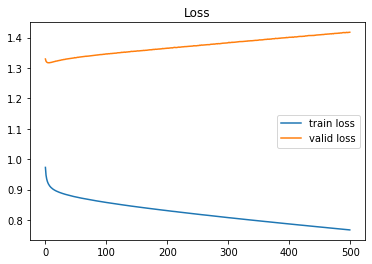

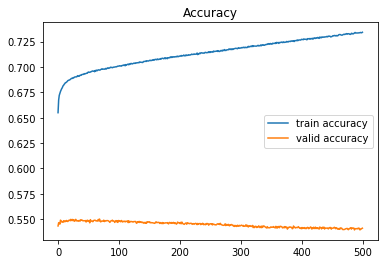

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()